Bike sales dataset - What pattern/trend can I find in the customers who purchase/did not purchase bikes? Can I predict if a customer will purchase a bike?
1. Find the relationship between feature columns and the target column
2. Which feature column affects the target column greatly?
3. Plot these feature columns against target column to find hidden relationship
4. Build model to predict if a customer will purchase a bike
5. Build different models to compare
6. Optimize models to get best accuracy

Feature columns impact on target column based on self judgement:
- Martial Status - Low
- Gender - Low
- Income - High
- Children - High
- Education - Low
- Occupation - High
- Home Owner - Low
- Cars - High
- Commute Distance - High
- Region - High
- Age - High
- Age Brackets - High

Notes:
- There exits outliers in some fields. Models should be built to test dataset with and without outliers and compare results.

## Import dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [2]:
bike_sales_df = pd.read_excel('Bike Sales Dashboard.xlsx',sheet_name='bike_buyers')
bike_sales_df.head(10)

,ID,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes
5,13507,Married,Female,10000,2,Partial College,Manual,Yes,0,1-2 Miles,Europe,50,Middle Age,No
6,27974,Single,Male,160000,2,High School,Management,Yes,4,0-1 Miles,Pacific,33,Middle Age,Yes
7,19364,Married,Male,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,43,Middle Age,Yes
8,22155,Married,Male,20000,2,Partial High School,Clerical,Yes,2,5-10 Miles,Pacific,58,Old,No
9,19280,Married,Male,120000,2,Partial College,Manual,Yes,1,0-1 Miles,Europe,40,Middle Age,Yes


## EDA

In [3]:
bike_sales_df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,56360.000000,1.898000,1.442000,44.163000
std,5347.333948,31085.635215,1.628572,1.125123,11.364488
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


### Overall Distribution of different features

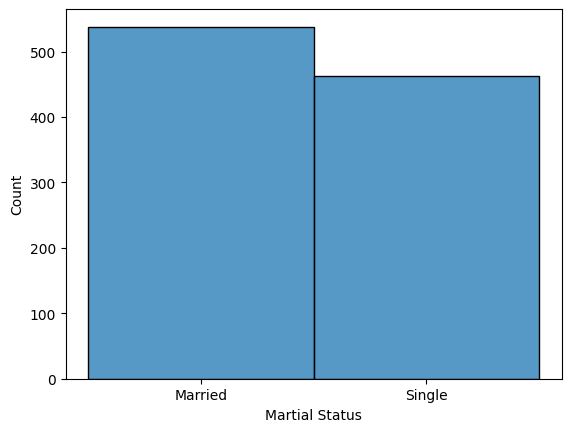

In [4]:
sns.histplot(data=bike_sales_df,x='Martial Status')
plt.show()

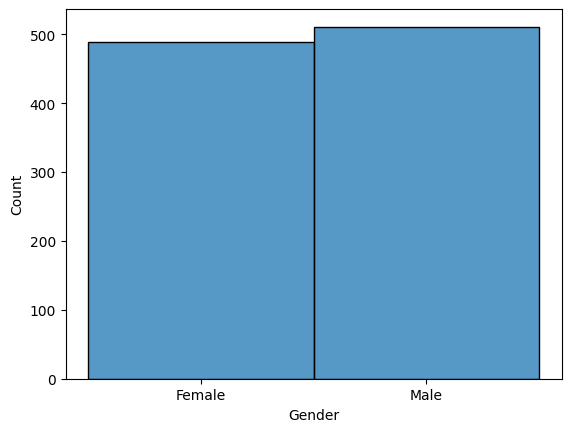

In [5]:
sns.histplot(data=bike_sales_df,x='Gender')
plt.show()

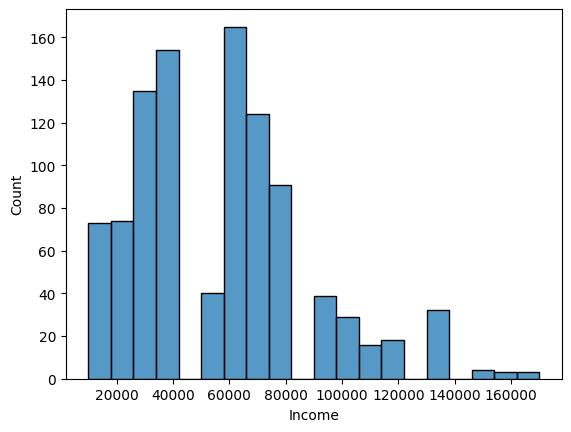

In [6]:
sns.histplot(data=bike_sales_df,x='Income')
plt.show()

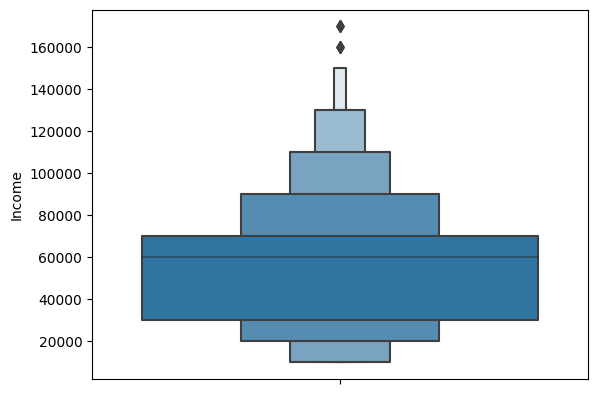

In [7]:
sns.boxenplot(data=bike_sales_df,y='Income')
plt.show()

In [8]:
print('Mean income:',bike_sales_df.Income.mean())
print('Median income:',bike_sales_df.Income.median())

Mean income: 56360.0
Median income: 60000.0


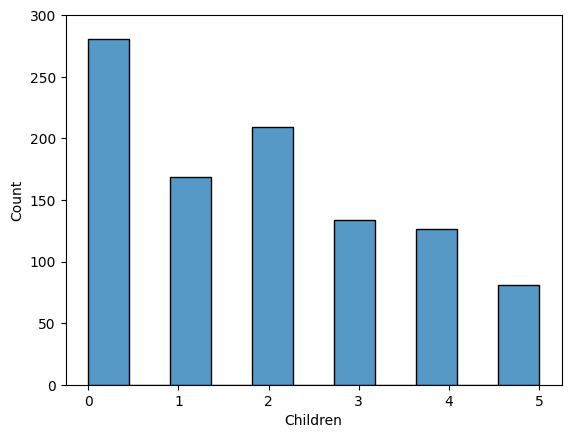

In [9]:
sns.histplot(data=bike_sales_df,x='Children')
plt.yticks(np.arange(0,350,50))
plt.show()

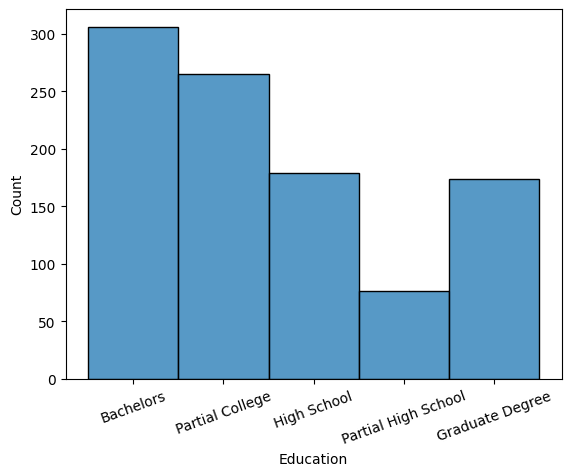

In [10]:
sns.histplot(data=bike_sales_df,x='Education')
plt.xticks(rotation=20)
plt.show()

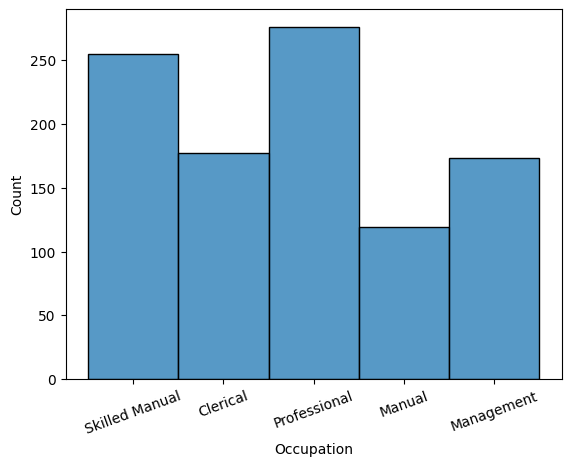

In [11]:
sns.histplot(data=bike_sales_df,x='Occupation')
plt.xticks(rotation=20)
plt.show()

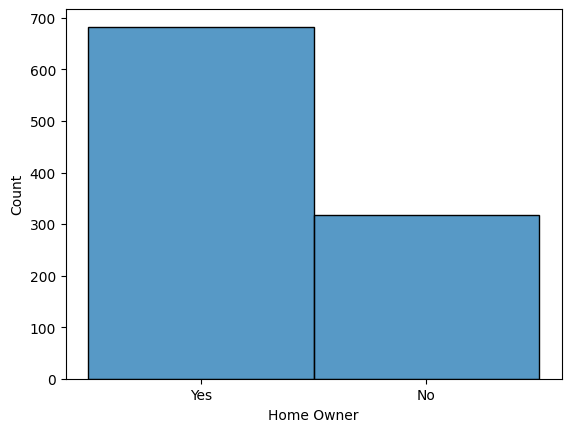

In [12]:
sns.histplot(data=bike_sales_df,x='Home Owner')
plt.show()

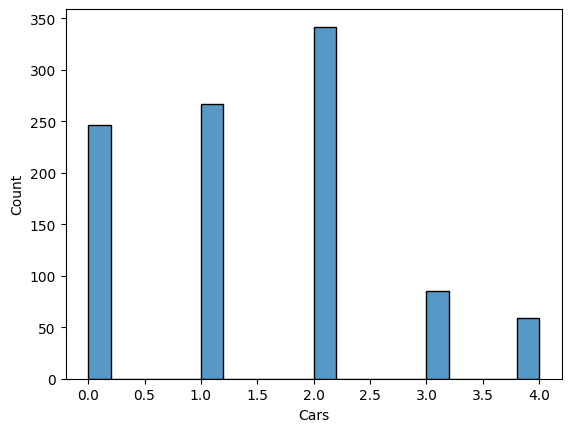

In [13]:
sns.histplot(data=bike_sales_df,x='Cars')
plt.show()

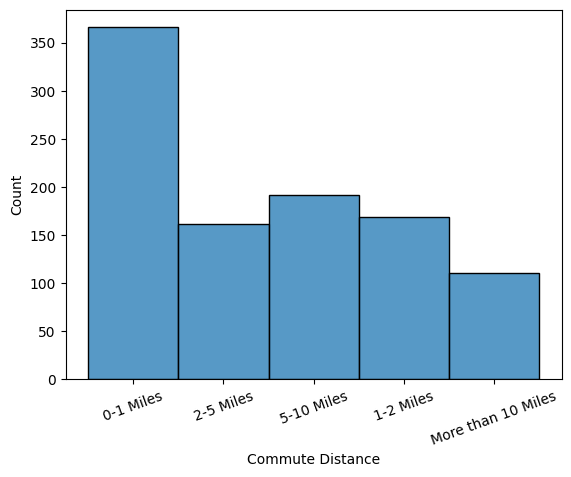

In [14]:
sns.histplot(data=bike_sales_df,x='Commute Distance')
plt.xticks(rotation=20)
plt.show()

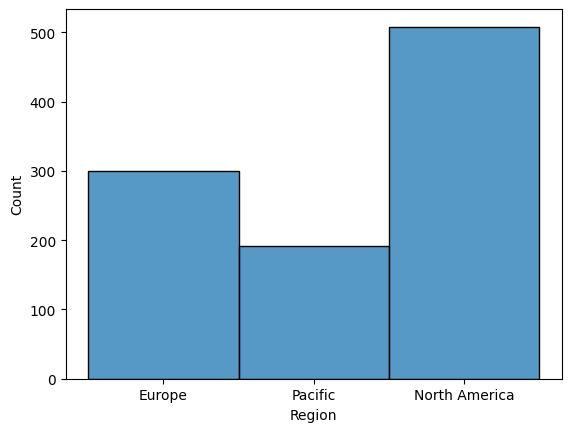

In [15]:
sns.histplot(data=bike_sales_df,x='Region')
plt.show()

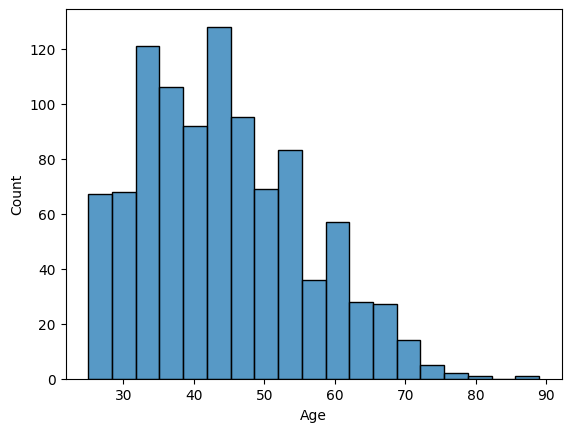

In [16]:
sns.histplot(data=bike_sales_df,x='Age')
plt.show()

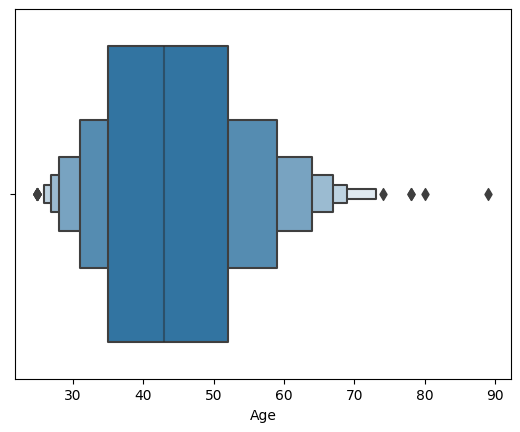

In [17]:
sns.boxenplot(data=bike_sales_df,x='Age')
plt.show()

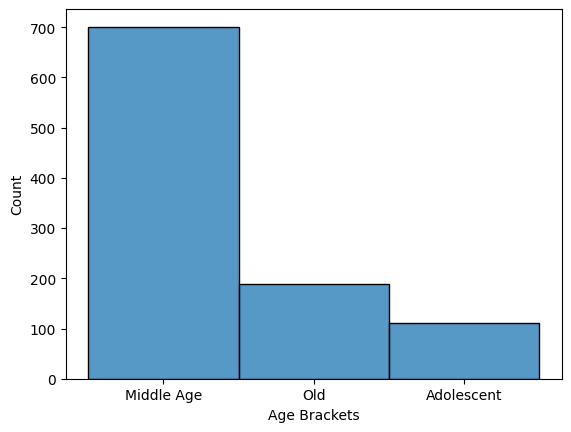

In [18]:
sns.histplot(data=bike_sales_df,x='Age Brackets')
plt.show()

In [19]:
bike_sales_df[bike_sales_df['Age Brackets']=='Middle Age']['Age'].describe() # Checking for age range

count    701.000000
mean      41.878745
std        6.536567
min       31.000000
25%       36.000000
50%       42.000000
75%       47.000000
max       54.000000
Name: Age, dtype: float64

In [20]:
bike_sales_df[bike_sales_df['Age Brackets']=='Old']['Age'].describe()

count    189.000000
mean      62.058201
std        5.569847
min       55.000000
25%       58.000000
50%       61.000000
75%       66.000000
max       89.000000
Name: Age, dtype: float64

In [21]:
bike_sales_df[bike_sales_df['Age Brackets']=='Adolescent']['Age'].describe()

count    110.000000
mean      27.972727
std        1.558988
min       25.000000
25%       27.000000
50%       28.000000
75%       29.000000
max       30.000000
Name: Age, dtype: float64

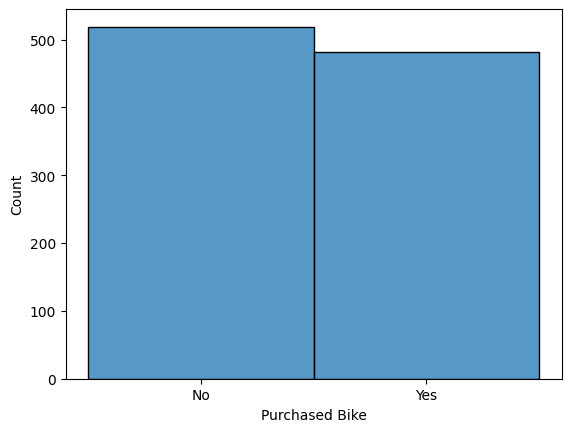

In [22]:
sns.histplot(data=bike_sales_df,x='Purchased Bike')
plt.show()

### Plotting features multiple features together

In [23]:
one_hot = pd.get_dummies(bike_sales_df['Gender'],dtype=int)
one_hot.head()

,Female,Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [24]:
bike_sales_df = bike_sales_df.join(one_hot)
bike_sales_df.head()

,ID,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike,Female,Male
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No,1,0
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No,0,1
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No,0,1
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes,0,1
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes,0,1


In [25]:
martial_status_gender_df = bike_sales_df.groupby('Martial Status').agg({'Female':'sum','Male':'sum'})
martial_status_gender_df

,Female,Male
Martial Status,,
Married,239,299
Single,250,212


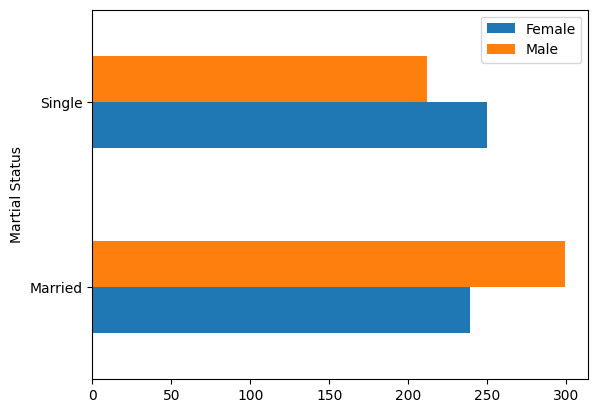

In [26]:
martial_status_gender_df.plot(kind='barh')
plt.show()

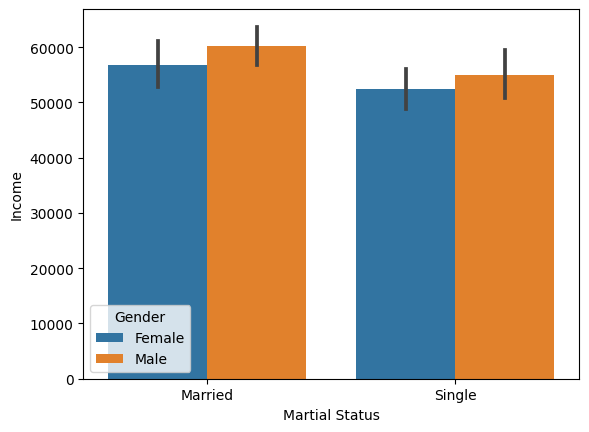

In [27]:
sns.barplot(data=bike_sales_df,x='Martial Status',y='Income',hue='Gender')
plt.show()

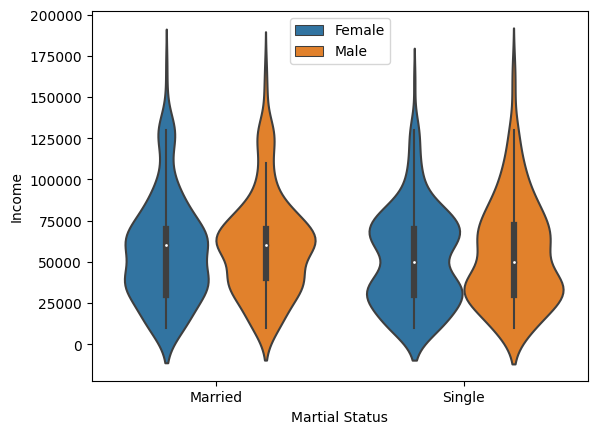

In [28]:
sns.violinplot(data=bike_sales_df,x='Martial Status',y='Income',hue='Gender')
plt.legend(loc='upper center')
plt.show()

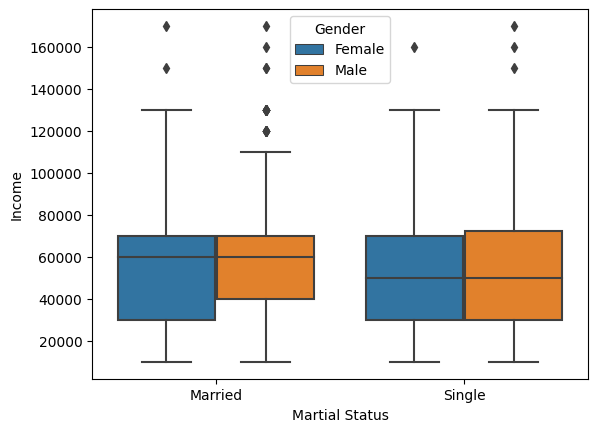

In [29]:
sns.boxplot(data=bike_sales_df,x='Martial Status',y='Income',hue='Gender')
plt.show()

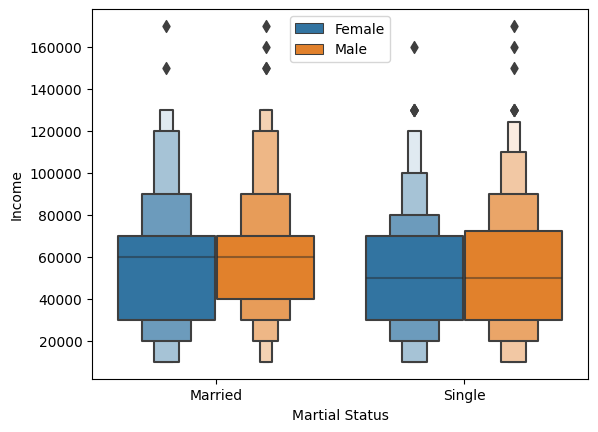

In [30]:
sns.boxenplot(data=bike_sales_df,x='Martial Status',y='Income',hue='Gender')
plt.legend(loc='upper center')
plt.show()

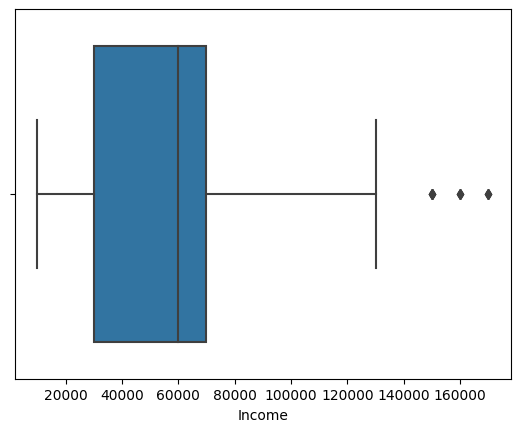

In [31]:
sns.boxplot(data=bike_sales_df,x='Income')
plt.show()

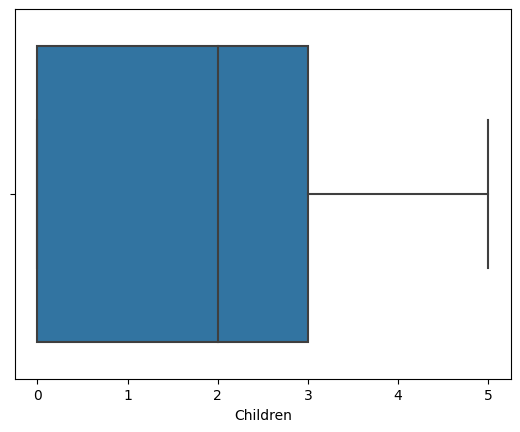

In [32]:
sns.boxplot(data=bike_sales_df,x='Children')
plt.show()

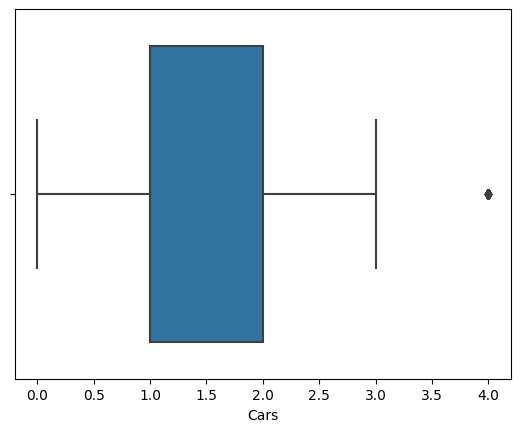

In [33]:
sns.boxplot(data=bike_sales_df,x='Cars')
plt.show()

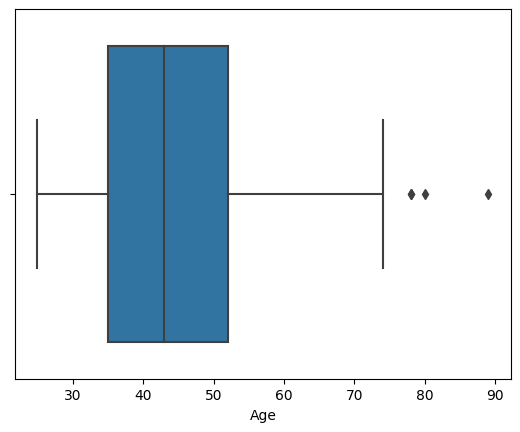

In [34]:
sns.boxplot(data=bike_sales_df,x='Age')
plt.show()

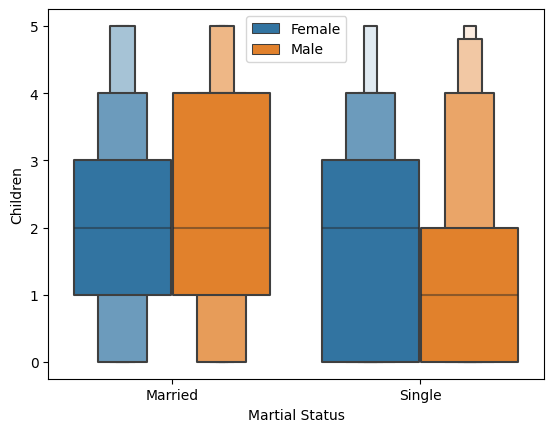

In [35]:
sns.boxenplot(data=bike_sales_df,x='Martial Status',y='Children',hue='Gender')
plt.legend(loc='upper center')
plt.show()

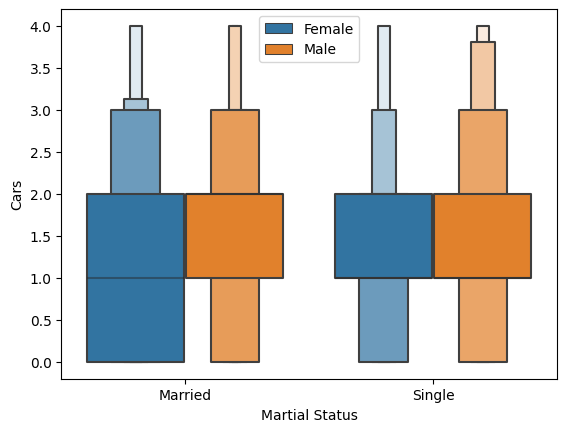

In [36]:
sns.boxenplot(data=bike_sales_df,x='Martial Status',y='Cars',hue='Gender')
plt.legend(loc='upper center')
plt.show()

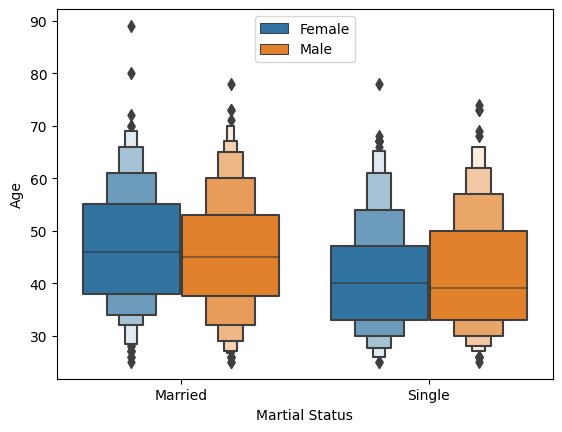

In [37]:
sns.boxenplot(data=bike_sales_df,x='Martial Status',y='Age',hue='Gender')
plt.legend(loc='upper center')
plt.show()

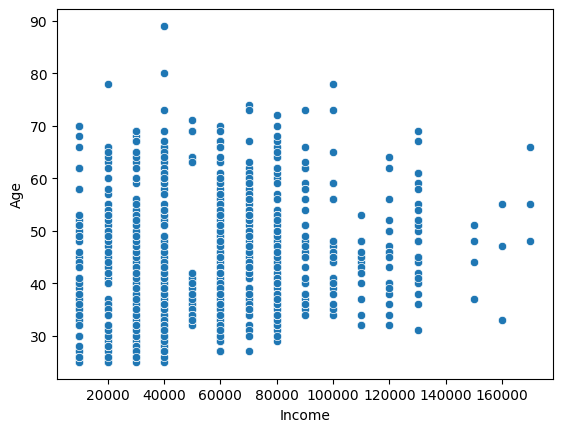

In [38]:
sns.scatterplot(data=bike_sales_df,x='Income',y='Age')
plt.show()

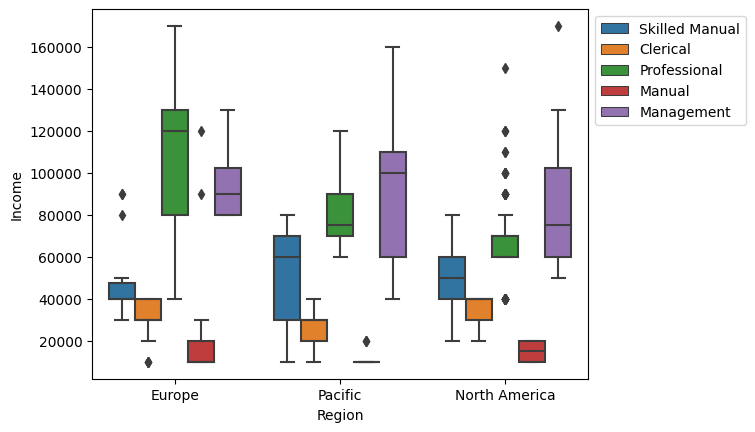

In [39]:
# Teasing insights from high importance features
sns.boxplot(data=bike_sales_df,x='Region',y='Income',hue='Occupation')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### Plotting with target feature (Purchased Bike)

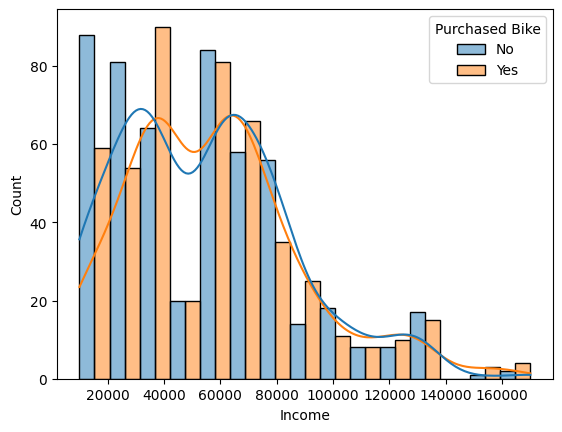

In [40]:
sns.histplot(data=bike_sales_df,x='Income',hue='Purchased Bike',multiple='dodge',bins=15,kde=True)
plt.show()

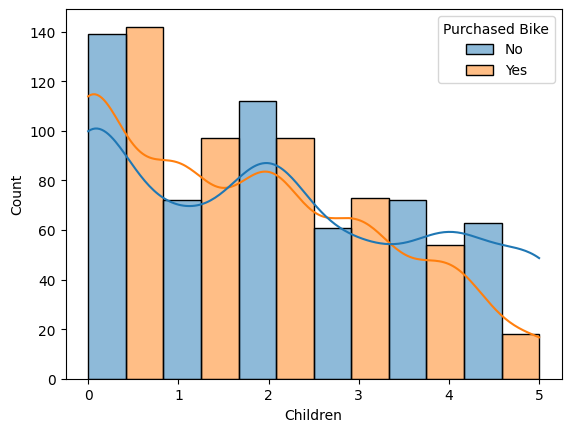

In [41]:
sns.histplot(data=bike_sales_df,x='Children',hue='Purchased Bike',multiple='dodge',bins=6,kde=True)
plt.show()

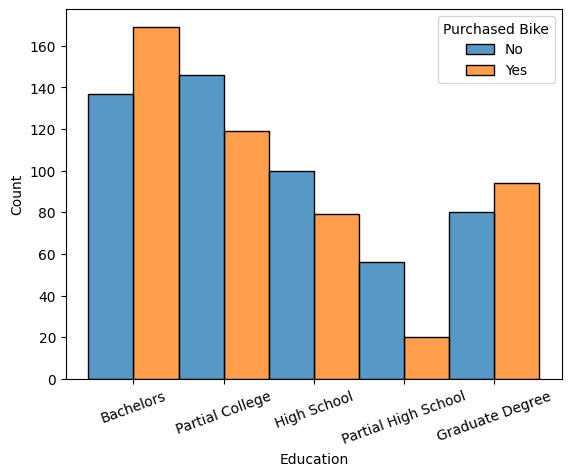

In [42]:
sns.histplot(data=bike_sales_df,x='Education',hue='Purchased Bike',multiple='dodge')
plt.xticks(rotation=20)
plt.show()

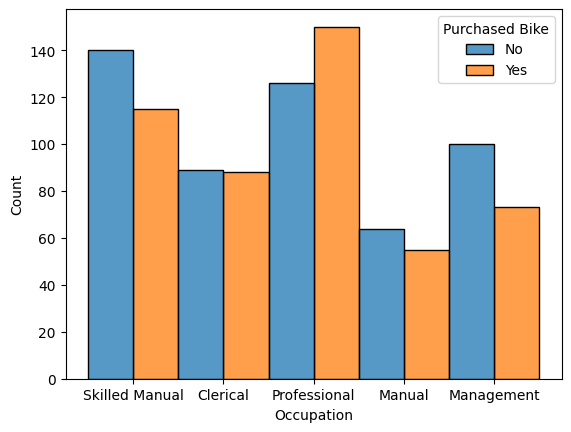

In [43]:
sns.histplot(data=bike_sales_df,x='Occupation',hue='Purchased Bike',multiple='dodge')
plt.show()

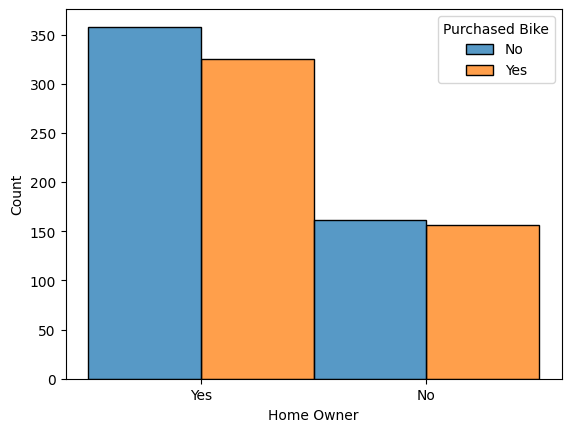

In [44]:
sns.histplot(data=bike_sales_df,x='Home Owner',hue='Purchased Bike',multiple='dodge')
plt.show()

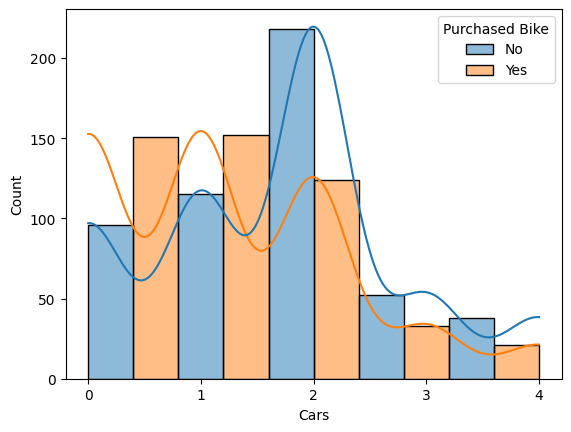

In [45]:
sns.histplot(data=bike_sales_df,x='Cars',hue='Purchased Bike',multiple='dodge',bins=5,kde=True)
plt.xticks(np.arange(0,5,1))
plt.show()

In [46]:
temp_df = bike_sales_df.sort_values('Commute Distance',ascending=True).reset_index(drop=True)
temp_df

,ID,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike,Female,Male
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No,1,0
1,26928,Single,Male,30000,1,Bachelors,Clerical,Yes,0,0-1 Miles,Europe,62,Old,Yes,0,1
2,17926,Single,Female,40000,0,Bachelors,Clerical,No,0,0-1 Miles,Pacific,28,Adolescent,Yes,1,0
3,11890,Married,Female,70000,5,Graduate Degree,Professional,Yes,1,0-1 Miles,North America,47,Middle Age,No,1,0
4,14443,Married,Male,130000,1,Graduate Degree,Management,Yes,4,0-1 Miles,North America,40,Middle Age,No,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21568,Married,Female,100000,0,High School,Management,Yes,4,More than 10 Miles,Pacific,34,Middle Age,Yes,1,0
996,20518,Married,Female,70000,2,Partial College,Professional,Yes,1,More than 10 Miles,North America,58,Old,No,1,0
997,17230,Married,Male,80000,0,Bachelors,Professional,Yes,3,More than 10 Miles,Pacific,30,Adolescent,No,0,1
998,15895,Single,Female,60000,2,Bachelors,Management,Yes,0,More than 10 Miles,North America,58,Old,No,1,0


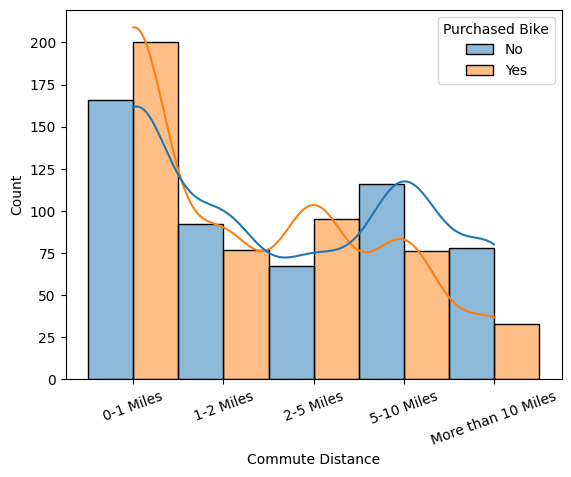

In [47]:
sns.histplot(data=temp_df,x='Commute Distance',hue='Purchased Bike',multiple='dodge',kde=True)
plt.xticks(rotation=20)
plt.show()

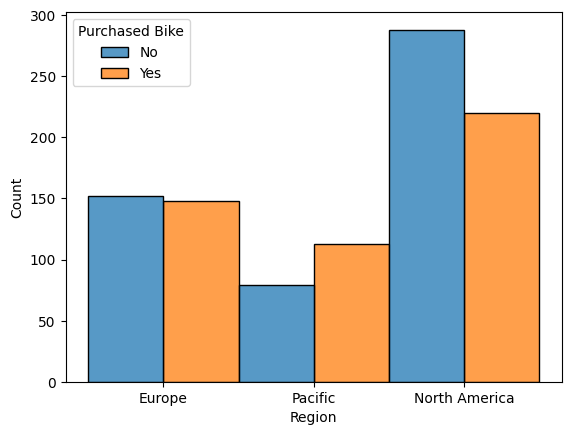

In [48]:
sns.histplot(data=bike_sales_df,x='Region',hue='Purchased Bike',multiple='dodge')
plt.show()

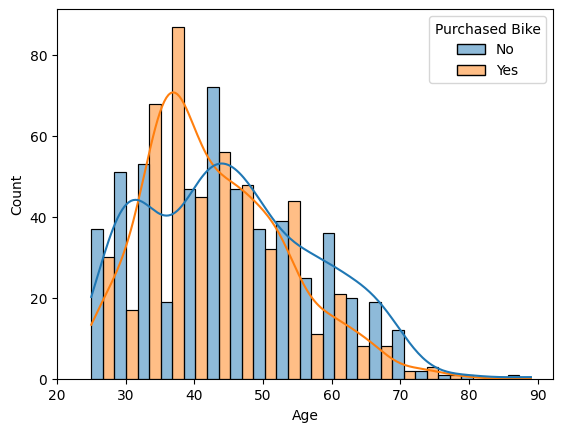

In [49]:
sns.histplot(data=bike_sales_df,x='Age',hue='Purchased Bike',multiple='dodge',kde=True)
plt.xticks(np.arange(20,100,10))
plt.show()

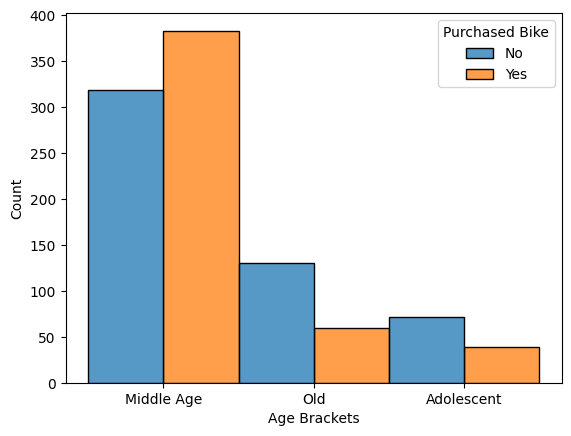

In [50]:
sns.histplot(data=bike_sales_df,x='Age Brackets',hue='Purchased Bike',multiple='dodge')
plt.show()
# Adolescent (25-30), Middle Age (31-54), Old (>54)

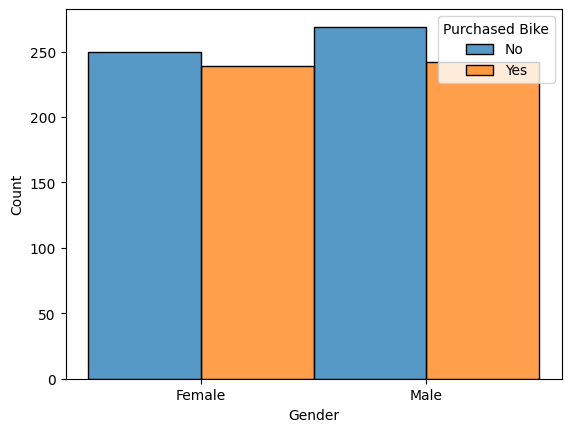

In [51]:
sns.histplot(data=bike_sales_df,x='Gender',hue='Purchased Bike',multiple='dodge')
plt.show()

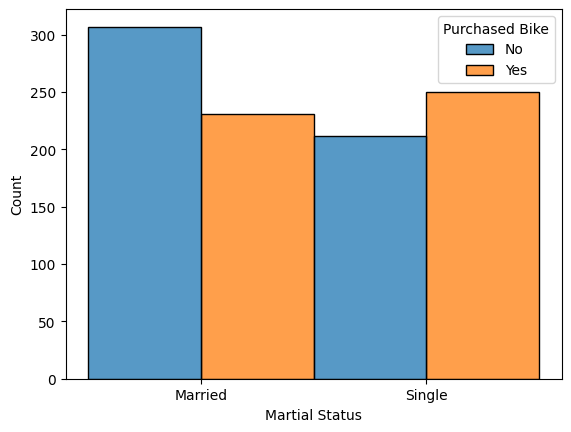

In [52]:
sns.histplot(data=bike_sales_df,x='Martial Status',hue='Purchased Bike',multiple='dodge')
plt.show()

## Building Classifiers

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
bike_sales_df = bike_sales_df.drop(columns=['Female','Male'])
bike_sales_df.head()

,ID,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes


In [55]:
one_hot = pd.get_dummies(data=bike_sales_df,dtype=int,drop_first=True,prefix={'Martial Status':'MS','Gender':'G','Education':'E','Occupation':'O','Home Owner':'HO','Commute Distance':'CD','Region':'R','Age Brackets':'AB','Purchased Bike':'PB'})
one_hot.head()

,ID,Income,Children,Cars,Age,MS_Single,G_Male,E_Graduate Degree,E_High School,E_Partial College,...,HO_Yes,CD_1-2 Miles,CD_2-5 Miles,CD_5-10 Miles,CD_More than 10 Miles,R_North America,R_Pacific,AB_Middle Age,AB_Old,PB_Yes
0,12496,40000,1,0,42,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,24107,30000,3,1,43,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,14177,80000,5,2,60,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,24381,70000,0,1,41,1,1,0,0,0,...,1,0,0,1,0,0,1,1,0,1
4,25597,30000,0,0,36,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [56]:
features = one_hot.columns.to_list()
features.remove('ID')
features.remove('PB_Yes')
features

['Income',
 'Children',
 'Cars',
 'Age',
 'MS_Single',
 'G_Male',
 'E_Graduate Degree',
 'E_High School',
 'E_Partial College',
 'E_Partial High School',
 'O_Management',
 'O_Manual',
 'O_Professional',
 'O_Skilled Manual',
 'HO_Yes',
 'CD_1-2 Miles',
 'CD_2-5 Miles',
 'CD_5-10 Miles',
 'CD_More than 10 Miles',
 'R_North America',
 'R_Pacific',
 'AB_Middle Age',
 'AB_Old']

In [57]:
X = one_hot[features]
y = one_hot['PB_Yes']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=23) # 20% hold out test set to measure model performance on unseen data i.e. final evaluation
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (800, 23)
X_test shape: (200, 23)
y_train shape: (800,)
y_test shape: (200,)


### Model Selection - Without hyperparameters tuning

In [70]:
import time

In [ ]:
from sklearn.preprocessing import StandardScaler # standardscaler to normalize feature values, reduce model bias on certain features
from sklearn.feature_selection import SequentialFeatureSelector, SelectPercentile, chi2, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate # k-fold cv resampling to:
# 1) use all of the data and not waste data by splitting into another validation set - a validation set can have important relationship that your model can miss
# 2) measure model performance on unseen data based on variance of each fold - bias/variance tradeoff - a complex model will show a higher variance in cv scores
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [61]:
list_clfs = [LogisticRegression(max_iter=1000),LinearSVC(dual='auto'),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]

In [75]:
def clf_scores_baseline_CV(models):
    overall_start_time = time.time()
    for model in models:
        start_time = time.time()
        print('Training: ',model)
        pipe = make_pipeline(StandardScaler(),model)
        scores = cross_validate(estimator=pipe,X=X_train,y=y_train,cv=10,scoring=['accuracy','roc_auc'])
        test_accuracy = scores['test_accuracy']
        test_roc_auc = scores['test_roc_auc']
        print(f'test_accuracy: {test_accuracy.mean():.2f} +/- {test_accuracy.std():.2f}')
        print(f'test_roc_auc: {test_roc_auc.mean():.2f} +/- {test_roc_auc.std():.2f}')
        print(f'Execution time: {(time.time()-start_time):.2f}s')
        print('-------------------------------------')
    print(f'Overall Execution time: {(time.time()-overall_start_time):.2f}s')
clf_scores_baseline_CV(list_clfs)

Training:  LogisticRegression(max_iter=1000)
test_accuracy: 0.65 +/- 0.05
test_roc_auc: 0.70 +/- 0.05
Execution time: 0.15s
-------------------------------------
Training:  LinearSVC(dual='auto')
test_accuracy: 0.65 +/- 0.06
test_roc_auc: 0.70 +/- 0.05
Execution time: 0.09s
-------------------------------------
Training:  KNeighborsClassifier()
test_accuracy: 0.65 +/- 0.05
test_roc_auc: 0.70 +/- 0.06
Execution time: 0.17s
-------------------------------------
Training:  DecisionTreeClassifier()
test_accuracy: 0.66 +/- 0.05
test_roc_auc: 0.66 +/- 0.05
Execution time: 0.11s
-------------------------------------
Training:  RandomForestClassifier()
test_accuracy: 0.70 +/- 0.05
test_roc_auc: 0.79 +/- 0.05
Execution time: 1.88s
-------------------------------------
Overall Execution time: 2.40s


In [ ]:
# sequential feature selection for each pipeline - pipeline fit_transform for each crossvalidation set, therefore has a ~10x time consumption
def clf_scores_baseline_CV(models):
    overall_start_time = time.time()
    for model in models:
        start_time = time.time()
        print('Training: ',model)
        sfs = SequentialFeatureSelector(model,scoring='accuracy')
        pipe = make_pipeline(StandardScaler(),sfs,model)
        scores = cross_validate(estimator=pipe,X=X_train,y=y_train,cv=10,scoring=['accuracy','roc_auc'])
        test_accuracy = scores['test_accuracy']
        test_roc_auc = scores['test_roc_auc']
        print(f'test_accuracy: {test_accuracy.mean():.2f} +/- {test_accuracy.std():.2f}')
        print(f'test_roc_auc: {test_roc_auc.mean():.2f} +/- {test_roc_auc.std():.2f}')
        print(f'Execution time: {(time.time()-start_time):.2f}s')
        print('-------------------------------------')
    print(f'Execution time: {(time.time()-overall_start_time):.2f}s')
clf_scores_baseline_CV(list_clfs)

Training:  LogisticRegression(max_iter=1000)
test_accuracy: 0.66 +/- 0.05
test_roc_auc: 0.70 +/- 0.05
Execution time: 25.11s
-------------------------------------
Training:  LinearSVC(dual='auto')
test_accuracy: 0.66 +/- 0.04
test_roc_auc: 0.71 +/- 0.04
Execution time: 16.23s
-------------------------------------
Training:  KNeighborsClassifier()
test_accuracy: 0.66 +/- 0.06
test_roc_auc: 0.71 +/- 0.06
Execution time: 47.72s
-------------------------------------
Training:  DecisionTreeClassifier()
test_accuracy: 0.64 +/- 0.03
test_roc_auc: 0.67 +/- 0.04
Execution time: 18.68s
-------------------------------------
Training:  RandomForestClassifier()
test_accuracy: 0.67 +/- 0.06
test_roc_auc: 0.74 +/- 0.07
Execution time: 1194.17s
-------------------------------------
Execution time: 1301.91s


In [ ]:
# added sequential feature selection for each model
def clf_scores_baseline_CV(models):
    overall_start_time = time.time()
    for model in models:
        start_time = time.time()
        print('Training: ',model)
        X_train_stdsclr = StandardScaler().fit_transform(X=X_train,y=y_train)
        sfs = SequentialFeatureSelector(model,scoring='accuracy')
        X_train_sfs = sfs.fit_transform(X=X_train_stdsclr,y=y_train)
        scores = cross_validate(estimator=model,X=X_train_sfs,y=y_train,cv=10,scoring=['accuracy','roc_auc'])
        test_accuracy = scores['test_accuracy']
        test_roc_auc = scores['test_roc_auc']
        print(f'test_accuracy: {test_accuracy.mean():.2f} +/- {test_accuracy.std():.2f}')
        print(f'test_roc_auc: {test_roc_auc.mean():.2f} +/- {test_roc_auc.std():.2f}')
        print(f'Execution time: {(time.time()-start_time):.2f}s')
        print('-------------------------------------')
    print(f'Execution time: {(time.time()-overall_start_time):.2f}s')
clf_scores_baseline_CV(list_clfs)

Training:  LogisticRegression(max_iter=1000)
test_accuracy: 0.67 +/- 0.06
test_roc_auc: 0.70 +/- 0.06
Execution time: 2.64s
-------------------------------------
Training:  LinearSVC(dual='auto')
test_accuracy: 0.66 +/- 0.06
test_roc_auc: 0.70 +/- 0.05
Execution time: 1.69s
-------------------------------------
Training:  KNeighborsClassifier()
test_accuracy: 0.70 +/- 0.04
test_roc_auc: 0.73 +/- 0.04
Execution time: 5.28s
-------------------------------------
Training:  DecisionTreeClassifier()
test_accuracy: 0.67 +/- 0.05
test_roc_auc: 0.69 +/- 0.06
Execution time: 2.09s
-------------------------------------
Training:  RandomForestClassifier()
test_accuracy: 0.71 +/- 0.03
test_roc_auc: 0.80 +/- 0.03
Execution time: 128.83s
-------------------------------------
Execution time: 140.53s


In [ ]:
# select percentile features for each pipeline
def clf_scores_baseline_CV(models):
    overall_start_time = time.time()
    for model in models:
        start_time = time.time()
        print('Training: ',model)
        feature_selector = SelectPercentile(score_func=f_classif,percentile=90)
        pipe = make_pipeline(StandardScaler(),feature_selector,model)
        scores = cross_validate(estimator=pipe,X=X_train,y=y_train,cv=10,scoring=['accuracy','roc_auc'])
        test_accuracy = scores['test_accuracy']
        test_roc_auc = scores['test_roc_auc']
        print(f'test_accuracy: {test_accuracy.mean():.2f} +/- {test_accuracy.std():.2f}')
        print(f'test_roc_auc: {test_roc_auc.mean():.2f} +/- {test_roc_auc.std():.2f}')
        print(f'Execution time: {(time.time()-start_time):.2f}s')
        print('-------------------------------------')
    print(f'Execution time: {(time.time()-overall_start_time):.2f}s')
clf_scores_baseline_CV(list_clfs)

Training:  LogisticRegression(max_iter=1000)
test_accuracy: 0.65 +/- 0.06
test_roc_auc: 0.70 +/- 0.05
Execution time: 0.18s
-------------------------------------
Training:  LinearSVC(dual='auto')
test_accuracy: 0.66 +/- 0.06
test_roc_auc: 0.70 +/- 0.05
Execution time: 0.10s
-------------------------------------
Training:  KNeighborsClassifier()
test_accuracy: 0.66 +/- 0.06
test_roc_auc: 0.70 +/- 0.06
Execution time: 0.19s
-------------------------------------
Training:  DecisionTreeClassifier()
test_accuracy: 0.67 +/- 0.04
test_roc_auc: 0.68 +/- 0.04
Execution time: 0.12s
-------------------------------------
Training:  RandomForestClassifier()
test_accuracy: 0.71 +/- 0.06
test_roc_auc: 0.78 +/- 0.05
Execution time: 1.89s
-------------------------------------
Execution time: 2.47s


In [ ]:
# Hyperparameters tuning for each model - decide on best model to use
# Update github
# 1) Objectives
# 2) Visualizations
# 3) Markdown documentations

### Model Selection - With hyperparameters tuning